In [1]:
# Chips

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

def science_plot(fontsize = 11):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()



51.715692610678396


<Figure size 600x600 with 0 Axes>

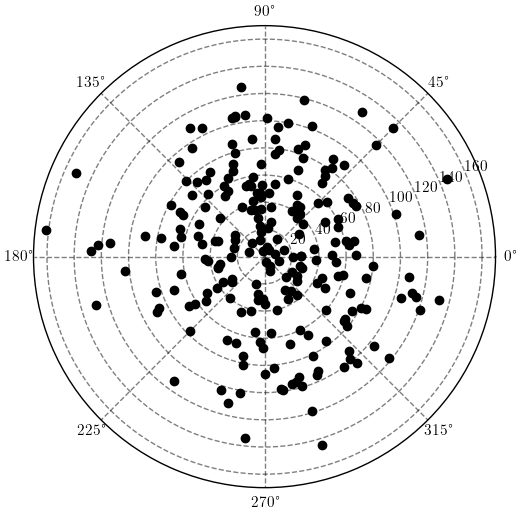

[ 6  8 20 24 21 25 30 26 20 13 18 10  6  3  2  1  1  0  0  0] [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]


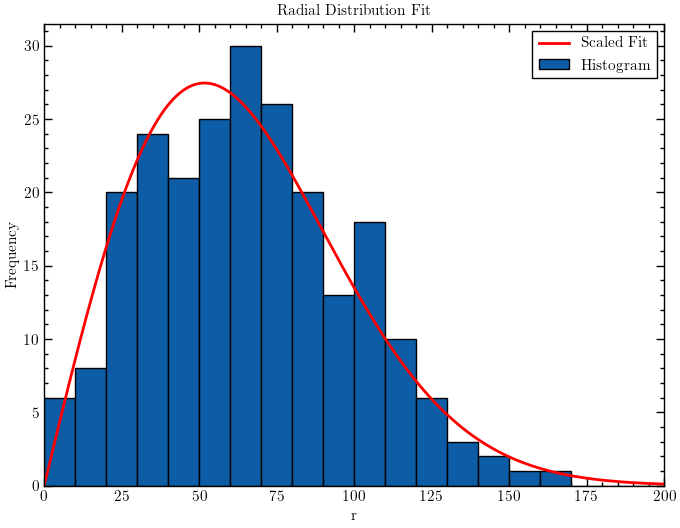

In [27]:
target_path = r"C:\Users\verci\Documents\Python Code\Physics157\CH1\targets.csv"
target_file = pd.read_csv(target_path, sep = ',')
# target_file = target_file.dropna()
# print(target_file)
# bins = target_file['bins']
# freqs = target_file['freqs']
theta = target_file['theta']
r = target_file['r']

x = r*np.cos(theta)
y = r*np.sin(theta)
std_ave = np.sqrt((np.std(x)**2 +np.std(y)**2)/2)
print(std_ave)
# Scatter_diagram
plt.figure(figsize=(6,6))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(np.radians(theta), r, color = 'k')
# ax.legend()
plt.show()

# # Normal_dist_histogram
# binning = np.arange(0,210, 10)
# plt.figure(figsize=(6,6))
# plt.hist(r, binning, edgecolor = 'k')
# plt.xlim(0,200)
# plt.show()


# Radial_histogram
# Step 4: Compute histogram of r
bin_edges = np.linspace(0, 200, 21)  # 50 bins from 0 to 5
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
print(heights, bins)
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 200, 1000)  # Smooth curve
f_r = radial_distribution(r_f, std_ave)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 9: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.grid()
plt.xlim(0,200)
plt.show()

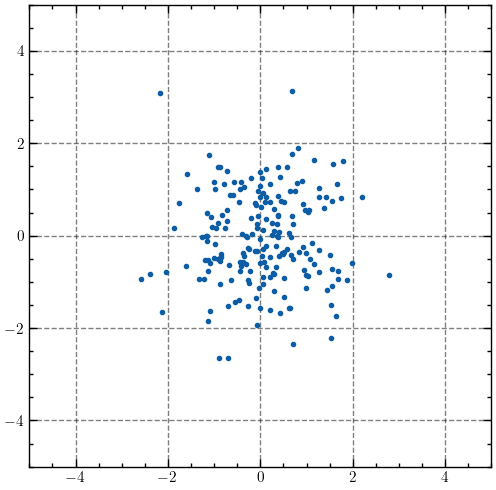

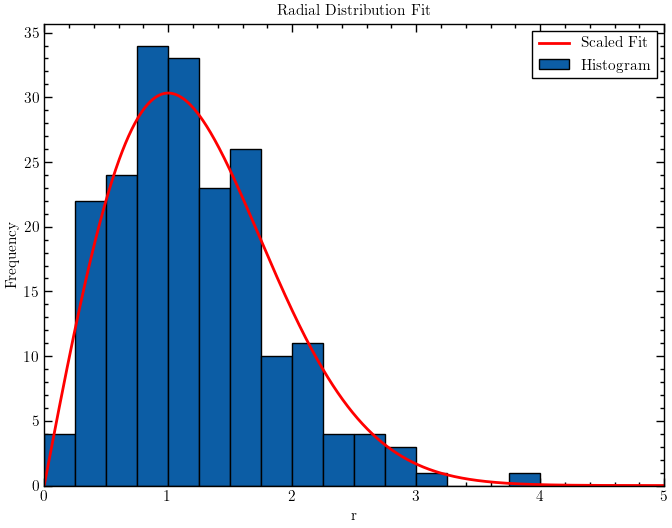

In [17]:
# Step 1: Generate 2D normally distributed points
size = 200
sigma = 1
x = np.random.normal(0, sigma, size)
y = np.random.normal(0, sigma, size)

# Step 2: Scatter plot of the points
plt.scatter(x, y, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal')
plt.show()

# Step 3: Compute radial distances
r = np.sqrt(x**2 + y**2)

# Step 4: Compute histogram of r
bin_edges = np.linspace(0, 5, 21)  # 50 bins from 0 to 5
heights, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_width = bins[1] - bins[0]
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 5: Define the theoretical function f(r) = (r / sigma^2) * exp(-r^2 / (2 sigma^2))
def radial_distribution(r, sigma):
    return (r / sigma**2) * np.exp(-r**2 / (2 * sigma**2))

# Step 6: Compute theoretical values
r_f = np.linspace(0, 5, 1000)  # Smooth curve
f_r = radial_distribution(r_f, sigma)

# Step 7: Scale f(r) to match histogram
A = np.sum(heights * bin_width) #/ np.trapezoid(f_r, r_f)  # Scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 8: Plot histogram and scaled theoretical curve
plt.bar(bin_centers, heights, width=bin_width, edgecolor = 'k', label='Histogram')
plt.plot(r_f, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 9: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.grid()
plt.xlim(0,5)
plt.show()


C:\Users\verci\AppData\Local\Temp\ipykernel_18268\3475604393.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A = 0.1*np.sum(hist_values) / np.trapz(f_r, bin_centers)  # Compute scaling factor


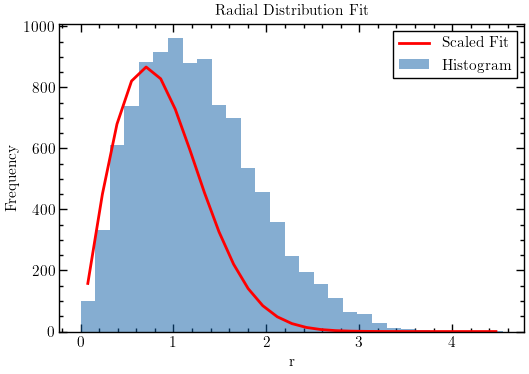

In [4]:
# Step 1: Generate 1000 normally distributed points
N = 10000
x = np.random.normal(0,1,N)
y = np.random.normal(0,1,N)

# Step 2: Compute radial distances
r = np.sqrt(x**2 + y**2)

# Step 3: Create histogram of radial distances
bin_edges = np.linspace(0, np.max(r), 30)  # Adjust bin count if needed
hist_values, bins = np.histogram(r, bins=bin_edges, density=False)  # Raw counts
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers

# Step 4: Define theoretical function f(r) = r e^(-r^2)
def radial_distribution(r):
    return r * np.exp(-r**2)

# Step 5: Compute theoretical values and scale them
f_r = radial_distribution(bin_centers)
A = 0.1*np.sum(hist_values) / np.trapz(f_r, bin_centers)  # Compute scaling factor
f_r_scaled = A * f_r  # Scale function to match histogram

# Step 6: Plot histogram and scaled theoretical curve
plt.figure(figsize=(6,4))
plt.bar(bin_centers, hist_values, width=np.diff(bins), alpha=0.5, label='Histogram')
plt.plot(bin_centers, f_r_scaled, color='r', linewidth=2, label='Scaled Fit')

# Step 7: Labels and legend
plt.xlabel('r')
plt.ylabel('Frequency')
plt.title('Radial Distribution Fit')
plt.legend()
plt.grid()
plt.show()
